# Molecular Informatics Exam - Answer Key
This notebook contains the solutions for the exam covering PubChem API and RDKit topics.

## Question 1: PubChem API - Compound Properties
Retrieve the CID, Molecular Formula, Molecular Weight, and IUPAC name for `Caffeine`.

In [1]:
# Solution
import requests
compound_name = 'caffeine'
url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{compound_name}/property/MolecularFormula,MolecularWeight,IUPACName/JSON'
response = requests.get(url)
data = response.json()
properties = data['PropertyTable']['Properties'][0]
properties

{'CID': 2519,
 'MolecularFormula': 'C8H10N4O2',
 'MolecularWeight': '194.19',
 'IUPACName': '1,3,7-trimethylpurine-2,6-dione'}

## Question 2: RDKit Molecule Creation
Create an RDKit molecule object for `CCO` and display its 2D structure and molecular weight.

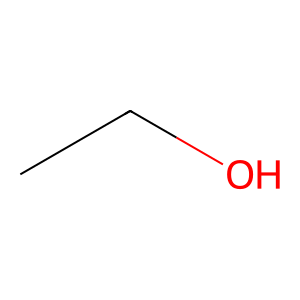

In [2]:
# Solution
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
smiles = 'CCO'
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)

In [3]:
# Calculate the molecular weight
Descriptors.MolWt(mol)

46.069

## Question 3: Substructure Matching
Check if a molecule contains a carboxylic acid group.

In [4]:
# Solution
def has_carboxyl_group(smiles):
    mol = Chem.MolFromSmiles(smiles)
    carboxyl = Chem.MolFromSmarts('C(=O)O')
    return mol.HasSubstructMatch(carboxyl)

# Test
has_carboxyl_group('CC(=O)O')

True

## Question 4: RDKit - Chemical Descriptors
Compute LogP, hydrogen bond donors, and acceptors for `CCCC`.

In [5]:
# Solution
from rdkit.Chem import rdMolDescriptors
smiles = 'CCCC'
mol = Chem.MolFromSmiles(smiles)
logp = Descriptors.MolLogP(mol)
h_bond_donors = rdMolDescriptors.CalcNumHBD(mol)
h_bond_acceptors = rdMolDescriptors.CalcNumHBA(mol)
logp, h_bond_donors, h_bond_acceptors

(1.8064, 0, 0)

## Question 5: Molecular Fingerprints
Generate the Morgan fingerprint for `CCO`.

In [21]:
# Solution
from rdkit.Chem import AllChem
from rdkit.Chem import rdFingerprintGenerator

mol = Chem.MolFromSmiles('CCO')

fingerprint_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
fingerprint = fingerprint_generator.GetFingerprint(mol)

for char in fingerprint:
    print(char, end='')


0000000000000000000000000000000001000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

## Question 6: Molecular Similarity
Calculate the Tanimoto similarity between `CCO` and `CCN`.

In [23]:
# Solution
import rdkit.DataStructs
mol1 = Chem.MolFromSmiles('CCO')
mol2 = Chem.MolFromSmiles('CCN')
fp1 = fingerprint_generator.GetFingerprint(mol1)
fp2 = fingerprint_generator.GetFingerprint(mol2)
similarity = rdkit.DataStructs.FingerprintSimilarity(fp1, fp2)
similarity

0.3333333333333333

## Question 7: PubChem Properties
Write a function that gets the rotatable bond count for `tamoxifen`.

In [24]:
import requests

def get_rotatable_bond_count(cid):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/RotatableBondCount/JSON"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        # Extract the RotatableBondCount value
        rotatable_bond_count = data.get("PropertyTable", {}).get("Properties", [{}])[0].get("RotatableBondCount", None)
        return rotatable_bond_count
    else:
        print(f"Error: {response.status_code}")
        return None

# Example usage for Tamoxifen
cid = 2733526  # CID for Tamoxifen
rotatable_bond_count = get_rotatable_bond_count(cid)

if rotatable_bond_count is not None:
    print(f"Rotatable Bond Count for Tamoxifen: {rotatable_bond_count}")


Rotatable Bond Count for Tamoxifen: 8


## Question 8: SMILES to InChI Conversion
Convert `CCO` to InChI.

In [25]:
# Solution
Chem.MolToInchi(Chem.MolFromSmiles('CCO'))

'InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3'

## Question 9: PubChem API - Compound Synonyms
Retrieve synonyms for `Aspirin`.

In [26]:
# Solution
url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/synonyms/JSON'
response = requests.get(url)
synonyms_data = response.json()
synonyms_data['InformationList']['Information'][0]['Synonym']

['aspirin',
 'ACETYLSALICYLIC ACID',
 '50-78-2',
 '2-Acetoxybenzoic acid',
 '2-(Acetyloxy)benzoic acid',
 'Acetosal',
 'O-Acetylsalicylic acid',
 'o-Acetoxybenzoic acid',
 'Acenterine',
 'Acetophen',
 'Acylpyrin',
 'Easprin',
 'Ecotrin',
 'Salicylic acid acetate',
 'Acetosalin',
 'Aspirdrops',
 'Polopiryna',
 'Salcetogen',
 'Aceticyl',
 'Acetonyl',
 'Acetylin',
 'Acetylsalicylate',
 'Acidum acetylsalicylicum',
 'Benaspir',
 'Colfarit',
 'Empirin',
 'Endydol',
 'Measurin',
 'Rhodine',
 'Saletin',
 'o-Carboxyphenyl acetate',
 'Enterosarein',
 'Enterosarine',
 'Acetisal',
 'Acetylsal',
 'Aspirine',
 'Bialpirinia',
 'Entericin',
 'Enterophen',
 'Micristin',
 'Pharmacin',
 'Premaspin',
 'Salacetin',
 'Solpyron',
 'Temperal',
 'Acesal',
 'Acisal',
 'Asagran',
 'Asteric',
 'Duramax',
 'Ecolen',
 'Extren',
 'Globoid',
 'Helicon',
 'Idragin',
 'Rhonal',
 'Aspro',
 'Novid',
 'Rheumintabletten',
 'Yasta',
 'Solprin acid',
 'Benzoic acid, 2-(acetyloxy)-',
 'Acimetten',
 'Bialpirina',
 'Claradin',


## Question 10: Identifying Functional Groups
Identify alcohol and amine groups in `CCN(CC)CCO`.

In [27]:
# Solution
def identify_functional_groups(smiles):
    mol = Chem.MolFromSmiles(smiles)
    alcohol = Chem.MolFromSmarts('CO')
    amine = Chem.MolFromSmarts('CN')
    return {
        'Alcohol': mol.HasSubstructMatch(alcohol),
        'Amine': mol.HasSubstructMatch(amine)
    }

# Test
identify_functional_groups('CCN(CC)CCO')

{'Alcohol': True, 'Amine': True}

## Question 11: Molecule Visualization
Create a grid visualization for the given molecules.

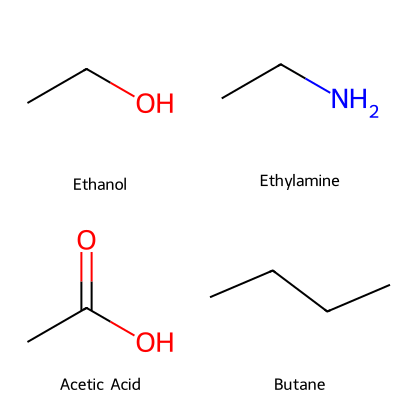

In [28]:
# Solution
mols = [Chem.MolFromSmiles(s) for s in ['CCO', 'CCN', 'CC(=O)O', 'CCCC']]
mol_names = ['Ethanol', 'Ethylamine', 'Acetic Acid', 'Butane']
Draw.MolsToGridImage(mols, molsPerRow=2, legends=mol_names)

## Question 12: Converting Between Formats
Write a function that returns the molecular formula, InChI, and canonical SMILES.

In [29]:
# Solution
def molecule_info(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return {
        'Molecular Formula': Chem.rdMolDescriptors.CalcMolFormula(mol),
        'InChI': Chem.MolToInchi(mol),
        'Canonical SMILES': Chem.MolToSmiles(mol)
    }

# Test
molecule_info('CCO')

{'Molecular Formula': 'C2H6O',
 'InChI': 'InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3',
 'Canonical SMILES': 'CCO'}